In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
customer_acquisition = pd.read_csv('C:\\Users\ASUS\Desktop\Analytix labs\ALABS_Python_CaseStudy\Python Foundation Case Study 2__ Credit Card Case Study\Customer Acqusition.csv')
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [98]:
repayment = pd.read_csv('C:\\Users\ASUS\Desktop\Analytix labs\ALABS_Python_CaseStudy\Python Foundation Case Study 2__ Credit Card Case Study\Repayment.csv')
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [99]:
spend = pd.read_csv('C:\\Users\ASUS\Desktop\Analytix labs\ALABS_Python_CaseStudy\Python Foundation Case Study 2__ Credit Card Case Study\spend.csv')
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [100]:
customer_acquisition.shape

(100, 8)

In [101]:
repayment.shape

(1523, 5)

In [102]:
spend.shape

(1500, 5)

In [103]:
customer_acquisition.duplicated().sum()

0

In [104]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [105]:
repayment = repayment.drop(columns=['Unnamed: 4'])

In [107]:
repayment.dropna(how='all')

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [108]:
repayments = repayment.dropna()

In [110]:
repayments.head()

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62


In [112]:
repayments.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

In [113]:
spend.duplicated().sum()

0

In [114]:
print(customer_acquisition.shape)
print(repayments.shape)
print(spend.shape)

(100, 8)
(1499, 4)
(1500, 5)


In [116]:
customer_acquisition.dtypes

No            int64
Customer     object
Age         float64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [117]:
repayments.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [118]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

### 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [28]:
original_mean = customer_acquisition['Age'].mean()
original_mean

46.49

In [29]:
customer_acquisition.loc[customer_acquisition['Age']<18,'Age'] = customer_acquisition['Age'].mean()

In [30]:
customer_acquisition['Age'].mean()

48.399399999999986

In [31]:
print('The new_mean is', customer_acquisition['Age'].mean())

The new_mean is 48.399399999999986


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [119]:
cust_spend = spend.merge(customer_acquisition, how='inner', on='Customer')
cust_spend.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [120]:
A = cust_spend[cust_spend["Amount"] > cust_spend['Limit']]
A

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
18,8,A8,5-Feb-04,BIKE,155562.58,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,110,A8,12-Jan-04,CAMERA,470561.03,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,124,A8,31-Mar-06,TRAIN TICKET,113366.26,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,138,A8,9-May-05,PETRO,371894.08,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,152,A8,29-May-05,CAMERA,335298.81,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277,A7,3-May-06,AIR TICKET,305050.62,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295,A7,23-Feb-05,CAMERA,314704.54,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313,A7,12-Jan-04,AUTO,498358.28,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331,A7,25-Jan-04,TRAIN TICKET,461282.47,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [121]:
A = cust_spend.loc[cust_spend["Amount"] > cust_spend["Limit"],"Amount"]
A

18      155562.58
19      470561.03
20      113366.26
21      371894.08
22      335298.81
          ...    
1495    305050.62
1496    314704.54
1497    498358.28
1498    461282.47
1499    165956.43
Name: Amount, Length: 607, dtype: float64

In [122]:
A = A/2
A

18       77781.290
19      235280.515
20       56683.130
21      185947.040
22      167649.405
           ...    
1495    152525.310
1496    157352.270
1497    249179.140
1498    230641.235
1499     82978.215
Name: Amount, Length: 607, dtype: float64

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [123]:
cust_repay = repayments.merge(customer_acquisition, how="inner", on='Customer')
cust_repay.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,6.0,A1,23-Feb-05,365366.62,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [124]:
cust_repay[cust_repay["Amount"] > cust_repay['Limit']]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
17,8.0,A8,5-Feb-04,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
18,110.0,A8,12-Jan-04,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,124.0,A8,31-Mar-06,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,138.0,A8,9-May-05,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,152.0,A8,8-May-06,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...
1493,259.0,A7,6-May-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1495,295.0,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,313.0,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,331.0,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [125]:
print("There are 600 repayment amount that should be replace with more than the Limit.")

There are 600 repayment amount that should be replace with more than the Limit.


### 2. From the above dataset create the following summaries:
 a. How many distinct customers exist?


In [126]:
print("There are",customer_acquisition['Customer'].nunique(),"distinct customers that exist.")

There are 100 distinct customers that exist.


### b. How many distinct categories exist?

In [127]:
B = customer_acquisition["Segment"].value_counts()
B

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

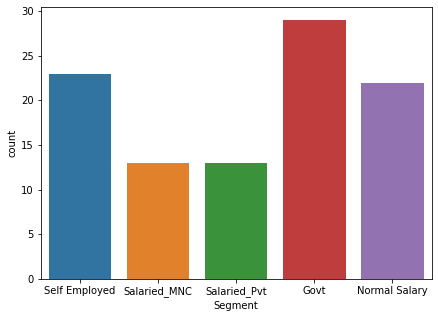

In [128]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(7,5))
sns.countplot(customer_acquisition["Segment"])
plt.show()

In [129]:
print("Therefore, there are",customer_acquisition["Segment"].nunique(),"distinct categories that exists.")

Therefore, there are 5 distinct categories that exists.


### c. What is the average monthly spend by customers?

In [130]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [134]:
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Year'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [135]:
spend[['Month','Year']]

,Month,Year
0,2004-01-12,2004
1,2004-01-03,2004
2,2004-01-15,2004
3,2004-01-25,2004
4,2005-01-17,2005
...,...,...
1495,2006-02-04,2006
1496,2006-03-25,2006
1497,2006-03-31,2006
1498,2006-03-23,2006


In [136]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly,Year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005,2005


In [137]:
C = round(spend.groupby(['Month','Year']).mean(),3)
C

,,Sl No:,Amount
Month,Year,,
2004-01-03,2004,751.625,250138.116
2004-01-12,2004,750.625,259996.849
2004-01-15,2004,752.625,238923.452
2004-01-25,2004,751.612,258969.130
2004-02-05,2004,749.500,221215.270
...,...,...,...
2006-09-03,2006,771.500,158520.091
2006-10-03,2006,772.500,236136.335
2006-11-03,2006,773.500,234714.120


In [138]:
final_1 = C.drop(['Sl No:'],axis=1)
final_1

,,Amount
Month,Year,
2004-01-03,2004,250138.116
2004-01-12,2004,259996.849
2004-01-15,2004,238923.452
2004-01-25,2004,258969.130
2004-02-05,2004,221215.270
...,...,...
2006-09-03,2006,158520.091
2006-10-03,2006,236136.335
2006-11-03,2006,234714.120


### d. What is the average monthly repayment by customers?

In [139]:
repayments.Month = pd.to_datetime(repayments.Month)
repayments.Month.info()

<class 'pandas.core.series.Series'>
Int64Index: 1499 entries, 1 to 1499
Series name: Month
Non-Null Count  Dtype         
--------------  -----         
1499 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.4 KB


In [140]:
repayments['Monthly'] = repayments['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%b"))
repayments['Monthly']

1       Jan
2       Jan
3       Jan
4       Jan
5       Feb
       ... 
1495    May
1496    May
1497    Jul
1498    Aug
1499    Sep
Name: Monthly, Length: 1499, dtype: object

In [141]:
repayments['Year'] = repayments['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
repayments['Year']

1       2004
2       2004
3       2004
4       2005
5       2005
        ... 
1495    2005
1496    2006
1497    2006
1498    2005
1499    2004
Name: Year, Length: 1499, dtype: object

In [142]:
final = round(repayments.groupby(['Month','Year']).mean(),3)
final

,,SL No:,Amount
Month,Year,,
2004-01-03,2004,744.438,235676.032
2004-01-12,2004,753.750,262778.465
2004-01-15,2004,745.438,248534.092
2004-01-25,2004,742.410,219906.536
2004-02-05,2004,764.333,256702.631
...,...,...,...
2006-09-03,2006,719.917,262533.881
2006-10-03,2006,720.917,260765.480
2006-11-03,2006,721.917,268797.446


In [143]:
final = repayments.drop(['SL No:'],axis=1)
final

,Customer,Month,Amount,Monthly,Year
1,A1,2004-01-03,245899.02,Jan,2004
2,A1,2004-01-15,259490.06,Jan,2004
3,A1,2004-01-25,437555.12,Jan,2004
4,A1,2005-01-17,165972.88,Jan,2005
5,A1,2005-02-23,365366.62,Feb,2005
...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,May,2005
1496,A68,2006-05-10,319836.49,May,2006
1497,A69,2006-07-11,247628.45,Jul,2006
1498,A70,2005-08-12,454016.51,Aug,2005


###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [144]:
cust_spend.head()

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [145]:
final.head()

,Customer,Month,Amount,Monthly,Year
1,A1,2004-01-03,245899.02,Jan,2004
2,A1,2004-01-15,259490.06,Jan,2004
3,A1,2004-01-25,437555.12,Jan,2004
4,A1,2005-01-17,165972.88,Jan,2005
5,A1,2005-02-23,365366.62,Feb,2005


In [146]:
final_3 = cust_spend.merge(final, how='inner', on='Customer')
final_3

,Sl No:,Customer,Month_x,Type,Amount_x,No,Age,City,Product,Limit,Company,Segment,Month_y,Amount_y,Monthly,Year
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
1,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
2,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
3,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005
4,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,365366.62,Feb,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,349,A7,19-Apr-06,JEWELLERY,165956.43,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2005-11-22,55108.71,Nov,2005
37262,349,A7,19-Apr-06,JEWELLERY,165956.43,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2005-12-03,429700.12,Dec,2005
37263,349,A7,19-Apr-06,JEWELLERY,165956.43,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2005-02-23,344628.72,Feb,2005
37264,349,A7,19-Apr-06,JEWELLERY,165956.43,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2006-03-31,336264.37,Mar,2006


In [147]:
final_3.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [148]:
final_3.head()

,Sl No:,Customer,Month_x,Type,Spend_Amount,No,Age,City,Product,Limit,Company,Segment,Month_y,Repay_Amount,Monthly,Year
0,1,A1,12-Jan-04,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
1,1,A1,12-Jan-04,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
2,1,A1,12-Jan-04,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
3,1,A1,12-Jan-04,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005
4,1,A1,12-Jan-04,JEWELLERY,485470.8,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,365366.62,Feb,2005


In [149]:
F = final_3.groupby(['Monthly','Year'])['Spend_Amount','Repay_Amount'].sum().reset_index()
F

,Monthly,Year,Spend_Amount,Repay_Amount
0,Apr,2004,2.108042e+08,2.285403e+08
1,Apr,2005,2.018261e+08,1.747894e+08
2,Apr,2006,5.407409e+08,6.093666e+08
3,Aug,2005,2.345989e+08,2.477449e+08
4,Aug,2006,7.830972e+07,7.167032e+07
5,Dec,2005,7.186922e+07,9.944533e+07
6,Dec,2006,7.075219e+07,7.087702e+07
7,Feb,2004,1.562344e+08,1.602419e+08
8,Feb,2005,9.701575e+08,9.416163e+08
9,Feb,2006,2.493959e+08,2.903280e+08


In [150]:
F['Interest_Amount'] = F.Repay_Amount-F.Spend_Amount
F

,Monthly,Year,Spend_Amount,Repay_Amount,Interest_Amount
0,Apr,2004,2.108042e+08,2.285403e+08,1.773603e+07
1,Apr,2005,2.018261e+08,1.747894e+08,-2.703662e+07
2,Apr,2006,5.407409e+08,6.093666e+08,6.862567e+07
3,Aug,2005,2.345989e+08,2.477449e+08,1.314604e+07
4,Aug,2006,7.830972e+07,7.167032e+07,-6.639403e+06
5,Dec,2005,7.186922e+07,9.944533e+07,2.757611e+07
6,Dec,2006,7.075219e+07,7.087702e+07,1.248300e+05
7,Feb,2004,1.562344e+08,1.602419e+08,4.007528e+06
8,Feb,2005,9.701575e+08,9.416163e+08,-2.854123e+07
9,Feb,2006,2.493959e+08,2.903280e+08,4.093202e+07


In [151]:
F['Profit'] = (F.Interest_Amount)*2.9/100
F['Profit'].head(5)

0    5.143449e+05
1   -7.840619e+05
2    1.990145e+06
3    3.812351e+05
4   -1.925427e+05
Name: Profit, dtype: float64

In [152]:
F.head()

,Monthly,Year,Spend_Amount,Repay_Amount,Interest_Amount,Profit
0,Apr,2004,2.108042e+08,2.285403e+08,17736030.58,5.143449e+05
1,Apr,2005,2.018261e+08,1.747894e+08,-27036615.55,-7.840619e+05
2,Apr,2006,5.407409e+08,6.093666e+08,68625673.85,1.990145e+06
3,Aug,2005,2.345989e+08,2.477449e+08,13146037.62,3.812351e+05
4,Aug,2006,7.830972e+07,7.167032e+07,-6639403.35,-1.925427e+05


### f. What are the top 5 product types?

In [153]:
Top_5 = final_3['Type'].value_counts().head(5)
Top_5

PETRO           4827
CAMERA          4236
FOOD            4054
AIR TICKET      3536
TRAIN TICKET    3384
Name: Type, dtype: int64

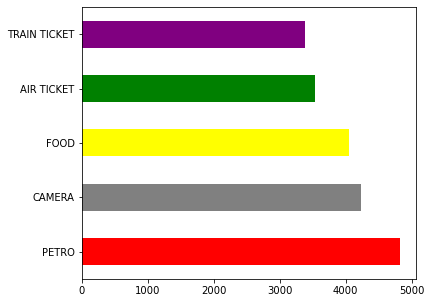

In [154]:
plt.figure(figsize=(6,5))
Top_5.plot(kind='barh', color = ['red', 'grey', 'yellow', 'green', 'purple'])
plt.show()

### g. Which city is having maximum spend?

In [155]:
Y = final_3.groupby(['City'],)['Spend_Amount'].sum().sort_values(ascending=False)
Y

City
COCHIN        1.806987e+09
BANGALORE     1.697209e+09
CALCUTTA      1.602129e+09
BOMBAY        1.314894e+09
CHENNAI       8.593118e+08
TRIVANDRUM    7.112498e+08
PATNA         5.908570e+08
DELHI         5.386721e+08
Name: Spend_Amount, dtype: float64

In [156]:
print("The city Cochin has maximum spend which is",Y.max())

The city Cochin has maximum spend which is 1806987281.66


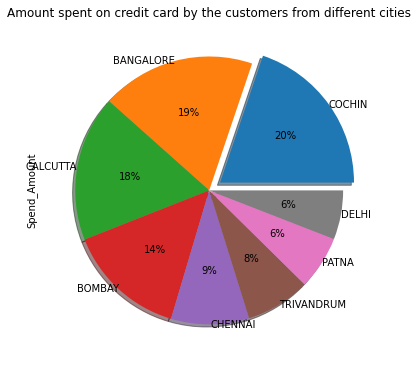

In [157]:
plt.figure(figsize=(6,13))
Y.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by the customers from different cities")
plt.show()

### h. Which age group is spending more money?

In [158]:
final_3['age_group'] = pd.cut(final_3['Age'], bins = np.arange(18,88,8), labels=["18-26","26-34","34-42","42-50","50-58","58-66","66-74","74-82"],include_lowest=True)
final_3['age_group']

0        74-82
1        74-82
2        74-82
3        74-82
4        74-82
         ...  
37261    18-26
37262    18-26
37263    18-26
37264    18-26
37265    18-26
Name: age_group, Length: 37266, dtype: category
Categories (8, object): ['18-26' < '26-34' < '34-42' < '42-50' < '50-58' < '58-66' < '66-74' < '74-82']

In [163]:
Age_spend = final_3.groupby(final_3['age_group'])['Spend_Amount'].sum().sort_values(ascending=False).reset_index()
Age_spend

,age_group,Spend_Amount
0,26-34,1.895082e+09
1,42-50,1.823585e+09
2,34-42,1.571268e+09
3,50-58,1.191810e+09
4,18-26,8.146276e+08
5,66-74,7.180049e+08
6,58-66,6.307825e+08
7,74-82,4.761484e+08


<Figure size 360x720 with 0 Axes>

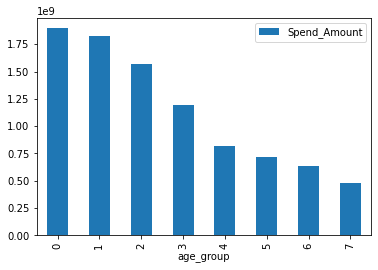

In [167]:
plt.figure(figsize=(5,10))
Age_spend.plot(kind = "bar")
plt.xlabel('age_group')
plt.show();

In [168]:
print("In this case 26-34 customer group had spend more.")

In this case 26-34 customer group had spend more.


### i. Who are the top 10 customers in terms of repayment?

In [169]:
Top = final_3.groupby(['Customer'])['Repay_Amount'].sum().sort_values(ascending=False).reset_index()
Top.head(10)

,Customer,Repay_Amount
0,A61,4.004874e+08
1,A60,3.752990e+08
2,A22,3.092945e+08
3,A21,2.988591e+08
4,A13,2.967320e+08
5,A43,2.631860e+08
6,A45,2.618984e+08
7,A12,2.583776e+08
8,A48,2.570649e+08
9,A14,2.462413e+08


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [247]:
City_wise_spend = final_3.pivot_table(values='Spend_Amount',index=['City'],columns=['Product','Year'],aggfunc='sum',observed=False,)
City_wise_spend

Product             Gold                                  Platimum  \
Year                2004          2005          2006          2004   
City                                                                 
BANGALORE   2.249555e+08  3.529301e+08  3.514313e+08  1.165334e+08   
BOMBAY      2.018518e+08  2.189935e+08  2.192363e+08  1.081109e+08   
CALCUTTA    1.714619e+08  2.926275e+08  3.265499e+08  2.180706e+08   
CHENNAI     4.919426e+07  7.003897e+07  6.948235e+07  1.379703e+08   
COCHIN      2.197297e+08  2.936068e+08  2.794282e+08  2.113196e+08   
DELHI       5.600156e+07  9.284009e+07  4.542917e+07  2.638763e+07   
PATNA       5.573609e+07  6.188751e+07  6.924847e+07  1.050488e+07   
TRIVANDRUM  3.834714e+07  5.752071e+07  7.669427e+07  1.127751e+08   

Product                                       Silver                \
Year                2005          2006          2004          2005   
City                                                                 
BANGALORE   1.684632e+08  1.418865e+08  1.079470e+08  1.193925e+08   
BOMBAY      1.375034e+08  1.524131e+08  9.203062e+07  1.006149e+08   
CALCUTTA    2.488205e+08  2.080727e+08  4.978241e+07  4.754151e+07   
CHENNAI     2.299266e+08  2.416147e+08  1.689669e+07  1.684197e+07   
COCHIN      2.973194e+08  2.493626e+08  7.574301e+07  8.267625e+07   
DELHI       3.078556e+07  2.198969e+07  6.834110e+07  1.070746e+08   
PATNA       2.100975e+07  6.302926e+07  9.304487e+07  1.157291e+08   
TRIVANDRUM  2.020206e+08  1.498365e+08  3.887769e+07  7.732610e+06   

Product                   
Year                2006  
City                      
BANGALORE   1.136699e+08  
BOMBAY      8.413900e+07  
CALCUTTA    3.920175e+07  
CHENNAI     2.734602e+07  
COCHIN      9.780181e+07  
DELHI       8.982269e+07  
PATNA       1.006670e+08  
TRIVANDRUM  2.744521e+07

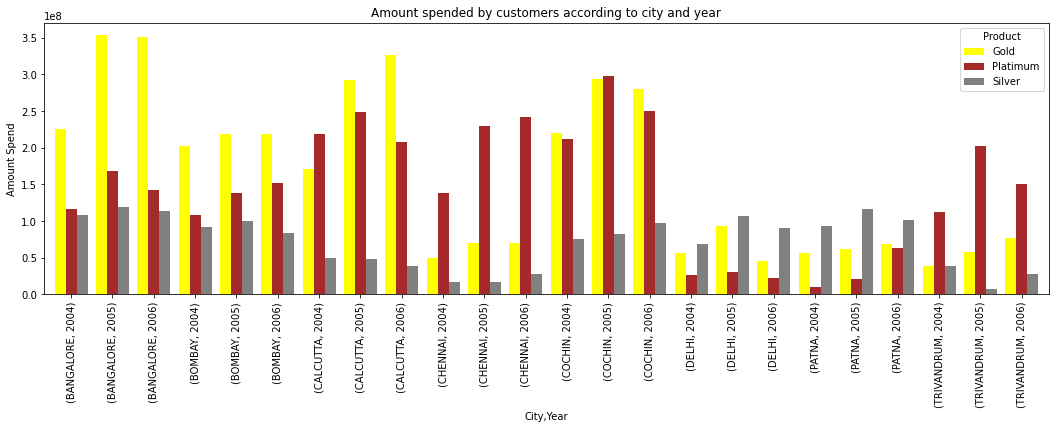

In [172]:
import warnings
warnings.filterwarnings('ignore')
City_wise_spend.plot(kind="bar",figsize=(18,5),width=0.8,color=['yellow','brown','grey'])
plt.title("Amount spended by customers according to city and year")
plt.ylabel("Amount Spend")
plt.show()

### 4. Create graphs for
 a. Monthly comparison of total spends, city wise

In [205]:
A = final_3.groupby(['City','Monthly'])['Spend_Amount'].sum().sort_index(ascending=False).reset_index()
A

,City,Monthly,Spend_Amount
0,TRIVANDRUM,Nov,6.095144e+07
1,TRIVANDRUM,May,1.417455e+08
2,TRIVANDRUM,Mar,1.088636e+08
3,TRIVANDRUM,Jun,2.944994e+07
4,TRIVANDRUM,Jul,2.776603e+07
...,...,...,...
88,BANGALORE,Jan,3.470219e+08
89,BANGALORE,Feb,2.667941e+08
90,BANGALORE,Dec,1.866087e+07
91,BANGALORE,Aug,6.249762e+07


In [206]:
F2 = A.pivot_table(values='Spend_Amount',index='City',columns='Monthly',aggfunc='sum')
F2

Monthly,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
City,,,,,,,,,,,,
BANGALORE,1.505934e+08,62497618.49,18660868.44,2.667941e+08,3.470219e+08,55183783.35,87229108.57,2.506881e+08,2.688080e+08,1.104441e+08,26159651.39,53128829.54
BOMBAY,1.396720e+08,41165452.66,14765594.72,1.902176e+08,2.676756e+08,63030642.49,48535876.27,1.695717e+08,1.981430e+08,6.678966e+07,50731112.68,64595221.89
CALCUTTA,1.681834e+08,81673928.33,16703396.25,2.470408e+08,3.545711e+08,58318505.65,58275048.97,2.240522e+08,3.049863e+08,6.628297e+07,7646064.83,14395186.15
CHENNAI,7.667873e+07,6948235.19,20407767.29,1.435401e+08,1.779671e+08,6948235.19,48819662.83,1.187800e+08,1.597067e+08,7.342105e+07,16991410.42,9102803.62
COCHIN,2.355902e+08,83418652.41,24359729.62,2.493147e+08,4.082264e+08,54525885.83,37670257.12,2.085890e+08,3.252637e+08,7.814747e+07,20311865.53,81569481.00
DELHI,6.040395e+07,23937146.30,22839657.92,5.747307e+07,1.313471e+08,19539208.51,NaN,6.370525e+07,1.057047e+08,2.620711e+07,7160530.01,20354343.38
PATNA,6.420959e+07,6876389.81,6876389.81,1.064760e+08,1.307747e+08,6876389.81,15379256.94,7.140317e+07,1.210259e+08,4.114070e+07,12128828.13,7689628.47
TRIVANDRUM,5.804002e+07,6391189.56,18008002.76,1.149314e+08,1.451027e+08,27766030.53,29449937.79,1.088636e+08,1.417455e+08,6.095144e+07,NaN,NaN


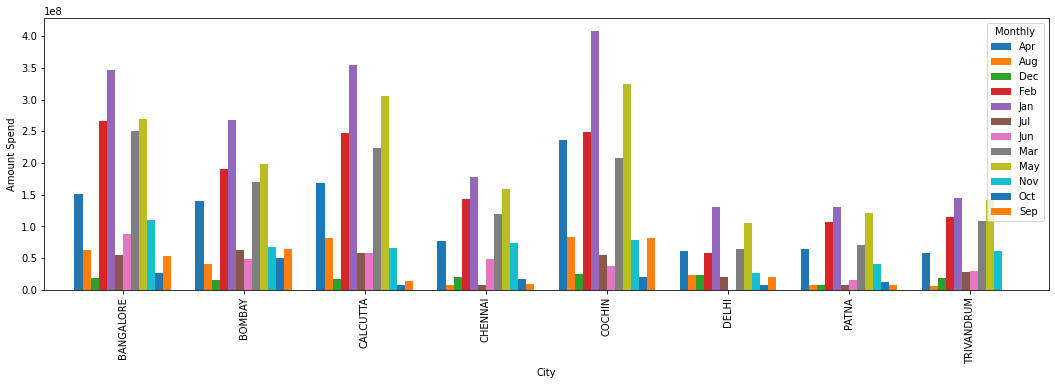

In [207]:
F2.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel('Amount Spend');

### b. Comparison of yearly spend on air tickets

In [184]:
G = final_3.groupby(['Year','Type'])['Spend_Amount'].sum().reset_index()
G.head()

,Year,Type,Spend_Amount
0,2004,AIR TICKET,2.316915e+08
1,2004,AUTO,5.268103e+07
2,2004,BIKE,8.491298e+07
3,2004,BUS TICKET,1.790735e+08
4,2004,CAMERA,2.960561e+08


In [185]:
air_ticket = G.loc[G['Type']=='AIR TICKET']
air_ticket

,Year,Type,Spend_Amount
0,2004,AIR TICKET,2.316915e+08
15,2005,AIR TICKET,2.918321e+08
30,2006,AIR TICKET,2.878818e+08


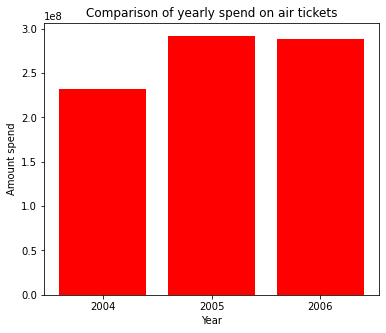

In [186]:
plt.figure(figsize=(6,5))
plt.bar(air_ticket["Year"],height=air_ticket["Spend_Amount"],color="red")
plt.title("Comparison of yearly spend on air tickets")
plt.xlabel('Year')
plt.ylabel('Amount spend')
plt.show()

###  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [190]:
Product = final_3.pivot_table(values="Spend_Amount",index="Product",columns="Monthly", aggfunc='sum',dropna=True,)
Product.reset_index()

Monthly,Product,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Gold,3.992793e+08,1.578477e+08,46155823.28,5.740305e+08,8.317645e+08,1.516278e+08,1.258078e+08,5.359834e+08,8.083391e+08,1.174114e+08,55222786.85,9.175316e+07
1,Platimum,3.703544e+08,1.188688e+08,77211601.84,5.783802e+08,6.944770e+08,1.077671e+08,1.513827e+08,4.290312e+08,4.998442e+08,3.165029e+08,60368888.71,1.015373e+08
2,Silver,1.837375e+08,3.619210e+07,19253981.69,2.233771e+08,4.364451e+08,3.279381e+07,4.816866e+07,2.506383e+08,3.172005e+08,8.947018e+07,25537787.43,5.754507e+07


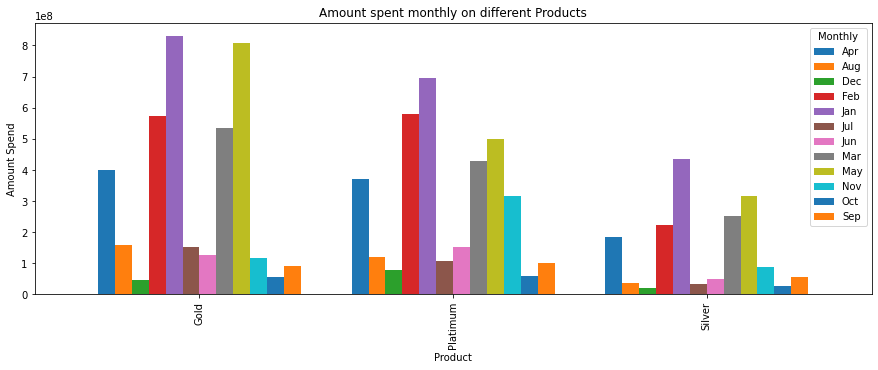

In [192]:
Product.plot(kind="bar",figsize=(15,5),width=0.8)
plt.title("Amount spent monthly on different Products")
plt.ylabel("Amount Spend")
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [320]:
def Top10(Product_Category,time_period):
    
    return final_3.loc[final_3.Product== Product_Category].groupby(['Customer','City','Product',time_period]).Spend_Amount.sum().reset_index().sort_values('Spend_Amount',ascending=False).head(10)


In [321]:
Product_Category=str(input("Please Enter Product Category which should be in (Gold/Silver/Platinum): "))
time_period=str(input("Please Enter Time Period which should be in (Monthly/Year): "))

Please Enter Product Category which should be in (Gold/Silver/Platinum): Silver
Please Enter Time Period which should be in (Monthly/Year): Year


In [323]:
Top10Customers_Analysis = Top10(Product_Category,time_period)
Top10Customers_Analysis

,Customer,City,Product,Year,Spend_Amount
8,A22,BOMBAY,Silver,2005,1.003970e+08
20,A46,PATNA,Silver,2005,9.996517e+07
7,A22,BOMBAY,Silver,2004,9.203062e+07
14,A24,DELHI,Silver,2005,8.592636e+07
9,A22,BOMBAY,Silver,2006,8.366420e+07
21,A46,PATNA,Silver,2006,7.689628e+07
18,A25,COCHIN,Silver,2006,6.941344e+07
15,A24,DELHI,Silver,2006,6.444477e+07
17,A25,COCHIN,Silver,2005,6.247210e+07
19,A46,PATNA,Silver,2004,6.151703e+07
